In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import geocat.datafiles as gdf
import geocat.viz as gv

In [2]:
ds = xr.open_dataset(gdf.get("netcdf_files/atmos.nc"), decode_times=False)

In [3]:
ds = ds.isel(time=0).drop("time")
TS = ds.TS

/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_56976/138827042.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds = ds.isel(time=0).drop("time")


In [4]:
TS = gv.xr_add_cyclic_longitudes(TS, "lon")

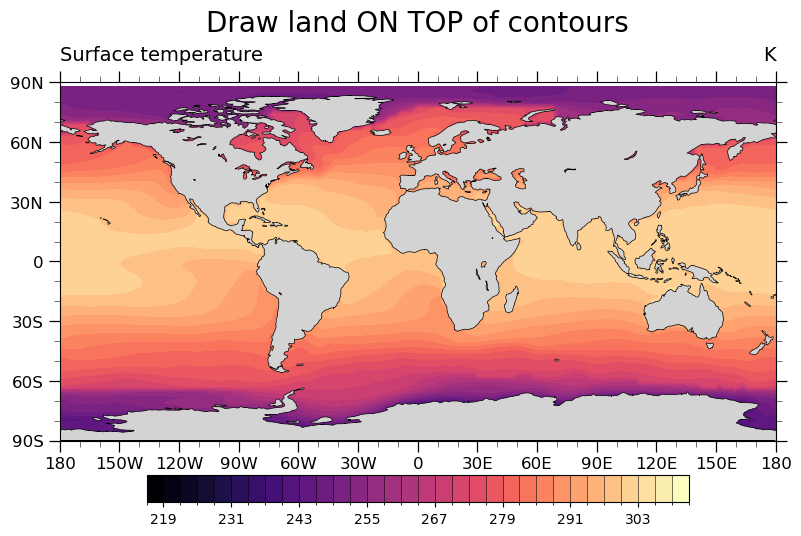

In [57]:
fig = plt.figure(figsize=(10, 6))

# Generate axes using Cartopy and draw land masses, coastlines, and lakes
ax = plt.axes(projection=ccrs.PlateCarree())

# Load shapefile for Lakes at 110m resolution
shpfilename = cfeature.shapereader.natural_earth(resolution='110m', category='physical', name='lakes')
reader = cfeature.shapereader.Reader(shpfilename)
lakes = [lake.geometry for lake in reader.records()]

# Get all land geometries
land_geoms = list(cfeature.LAND.geometries())

# Remove land areas intersecting with lakes
for lake in lakes:
    land_geoms = [land_geom.difference(lake) for land_geom in land_geoms]

# Add land areas without lakes
for land_geom in land_geoms:
    ax.add_geometries([land_geom], crs=ccrs.PlateCarree(), facecolor='lightgrey', edgecolor='black', linewidth=0.5)

# Plot filled contour
contour = TS.plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           cmap='magma',
                           levels=np.arange(216, 315, 3),
                           extend='neither',
                           add_colorbar=False,
                           add_labels=False,
                           zorder=0)
plt.colorbar(contour,
             ax=ax,
             ticks=np.linspace(219, 303, 8),
             orientation='horizontal',
             pad=0.075,
             drawedges=True,
             shrink=0.7)

# Use geocat.viz.util convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(-180, 180),
                             ylim=(-90, 90),
                             xticks=np.linspace(-180, 180, 13),
                             yticks=np.linspace(-90, 90, 7))

# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=12)

# Use geocat.viz.util convenience function to make latitude and
# longitude tick labels
gv.add_lat_lon_ticklabels(ax)
# Remove the degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to add titles
gv.set_titles_and_labels(ax,
                         maintitle='Draw land ON TOP of contours',
                         lefttitle=TS.long_name,
                         righttitle=TS.units,
                         lefttitlefontsize=14,
                         righttitlefontsize=14)

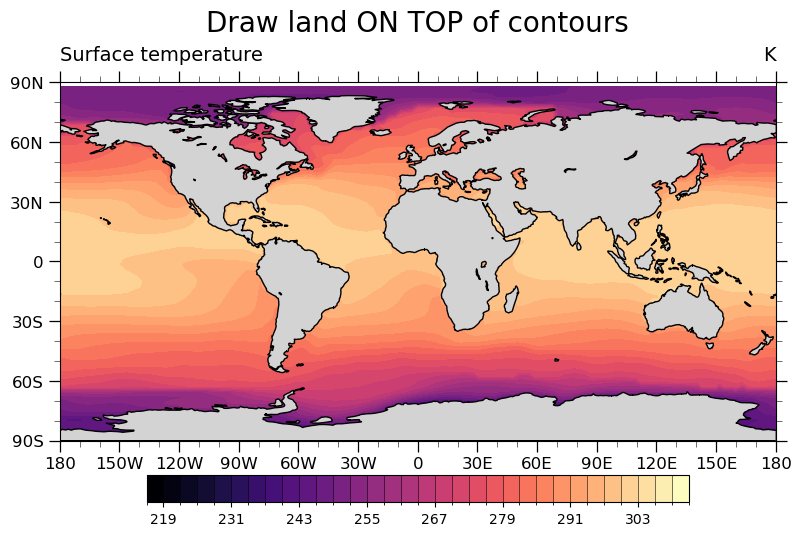

In [54]:
fig = plt.figure(figsize=(10, 6))

# Generate axes using Cartopy and draw land masses, coastlines, and lakes
ax = plt.axes(projection=ccrs.PlateCarree())

# Load shapefile for Lakes at 110m resolution
shpfilename = cfeature.shapereader.natural_earth(resolution='110m', category='physical', name='lakes')
reader = cfeature.shapereader.Reader(shpfilename)
lakes = [lake.geometry for lake in reader.records()]

# Get all land geometries
land_geoms = list(cfeature.LAND.geometries())

# Remove land areas intersecting with lakes
for lake in lakes:
    land_geoms = [land_geom.difference(lake) for land_geom in land_geoms]

# Add land areas without lakes to axes
for land_geom in land_geoms:
    ax.add_geometries([land_geom], crs=ccrs.PlateCarree(), facecolor='lightgrey', edgecolor='black')

# Plot filled contour
contour = TS.plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           cmap='magma',
                           levels=np.arange(216, 315, 3),
                           extend='neither',
                           add_colorbar=False,
                           add_labels=False,
                           zorder=0)
plt.colorbar(contour,
             ax=ax,
             ticks=np.linspace(219, 303, 8),
             orientation='horizontal',
             pad=0.075,
             drawedges=True,
             shrink=0.7)

# Use geocat.viz.util convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(-180, 180),
                             ylim=(-90, 90),
                             xticks=np.linspace(-180, 180, 13),
                             yticks=np.linspace(-90, 90, 7))

# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=12)

# Use geocat.viz.util convenience function to make latitude and
# longitude tick labels
gv.add_lat_lon_ticklabels(ax)
# Remove the degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to add titles
gv.set_titles_and_labels(ax,
                         maintitle='Draw land ON TOP of contours',
                         lefttitle=TS.long_name,
                         righttitle=TS.units,
                         lefttitlefontsize=14,
                         righttitlefontsize=14)